## Load data

In [1]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from model import *
from visual_functions import *
from sweep_configs import *
from sklearn.model_selection import train_test_split
from wandb.keras import WandbCallback
#from optimization import *
%matplotlib inline

## ---------------------- load data ----------------------------------------
data_dir = "./datasets/"

displays = np.load(data_dir + "displays.npy", "r")
displays_test = np.load(data_dir + "displays_test.npy", "r")
params = np.load(data_dir + "params.npy", "r")
params_test = np.load(data_dir + "params_test.npy", "r")

## Display data

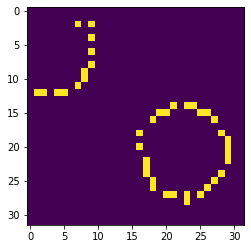

[ 5.58549798  2.58549798  7.41549798 20.98698837 22.98698837  6.81698837]


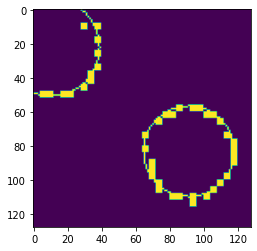

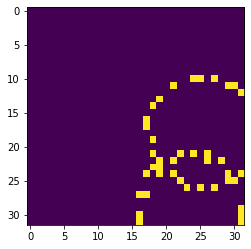

[18.63384592 25.63384592  8.46384592 29.41547827 24.41547827  8.24547827]


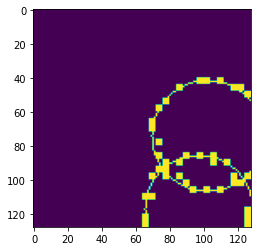

In [2]:
for i in range(2):
    plt.imshow(displays[i])
    plt.show()
    print(params[i])
    plt.imshow(plot_single_event(displays[i], params[i]))
    plt.show()

## First training attempts

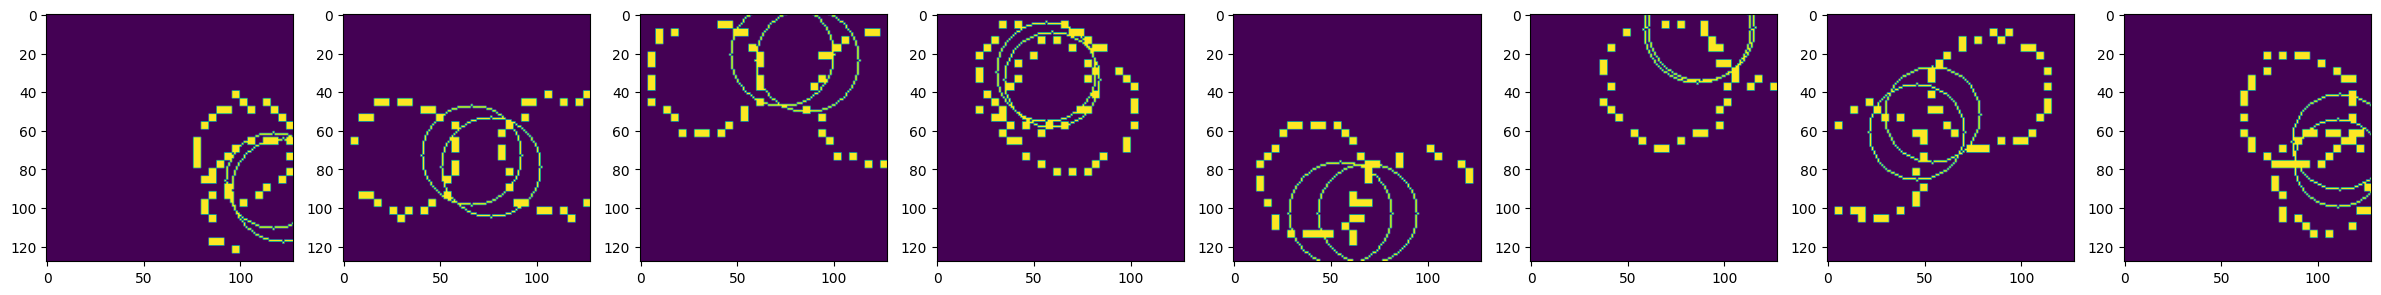

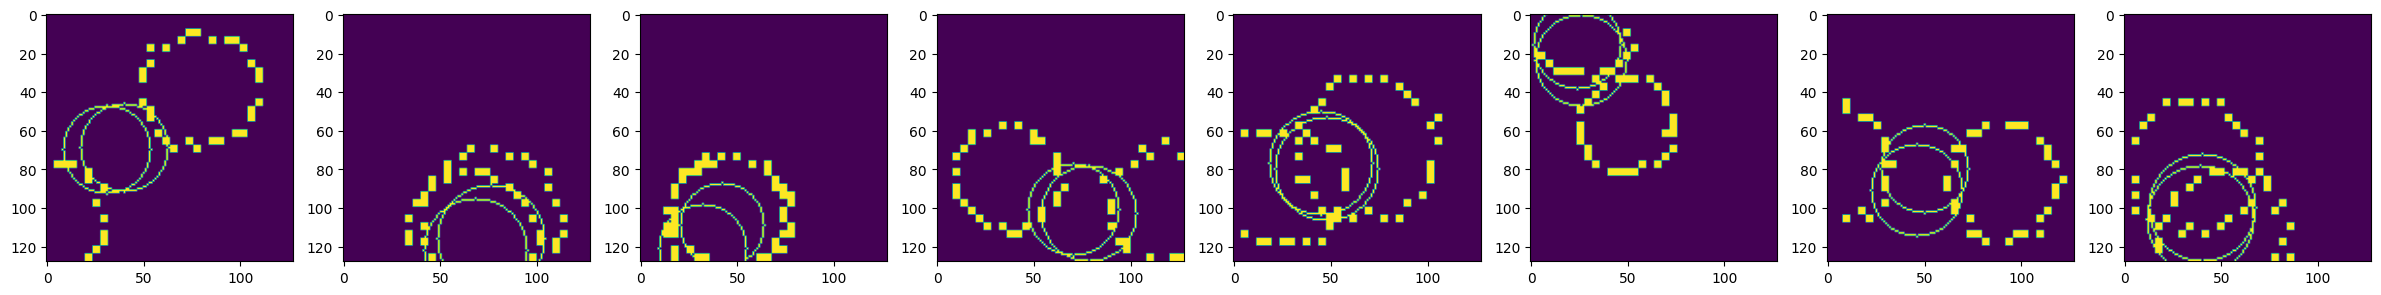

In [3]:
model = tf.keras.models.load_model("models/no_flipping_demonstration.model")
for i in range(2):
    compare_true_and_predict(displays_test, params_test, model, i, show_true=False)

## Swapping ring parameters

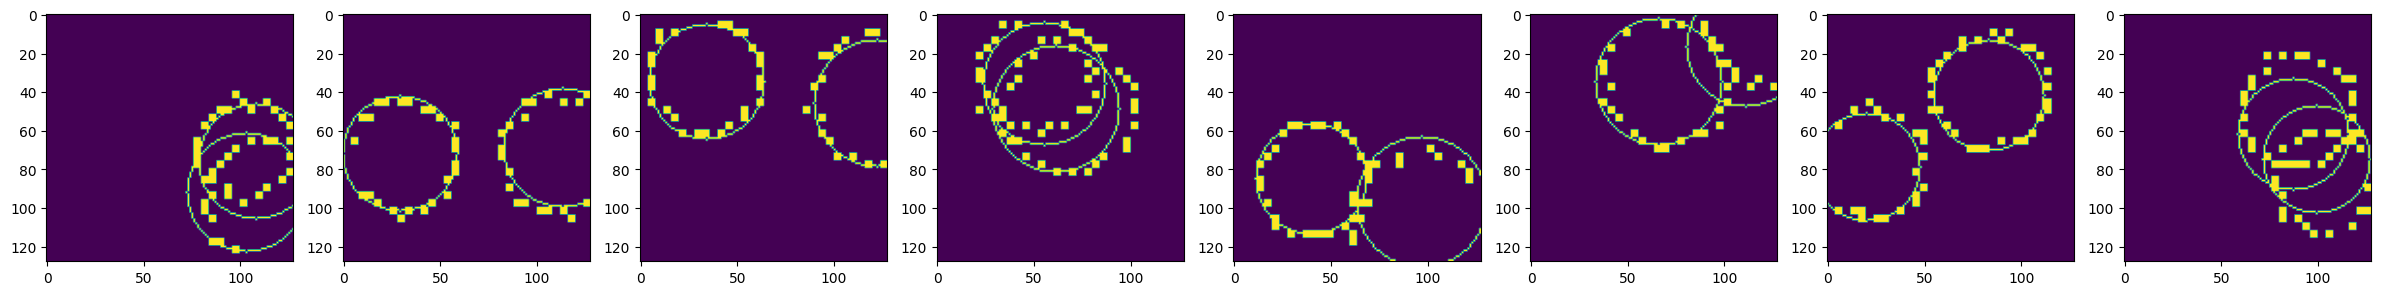

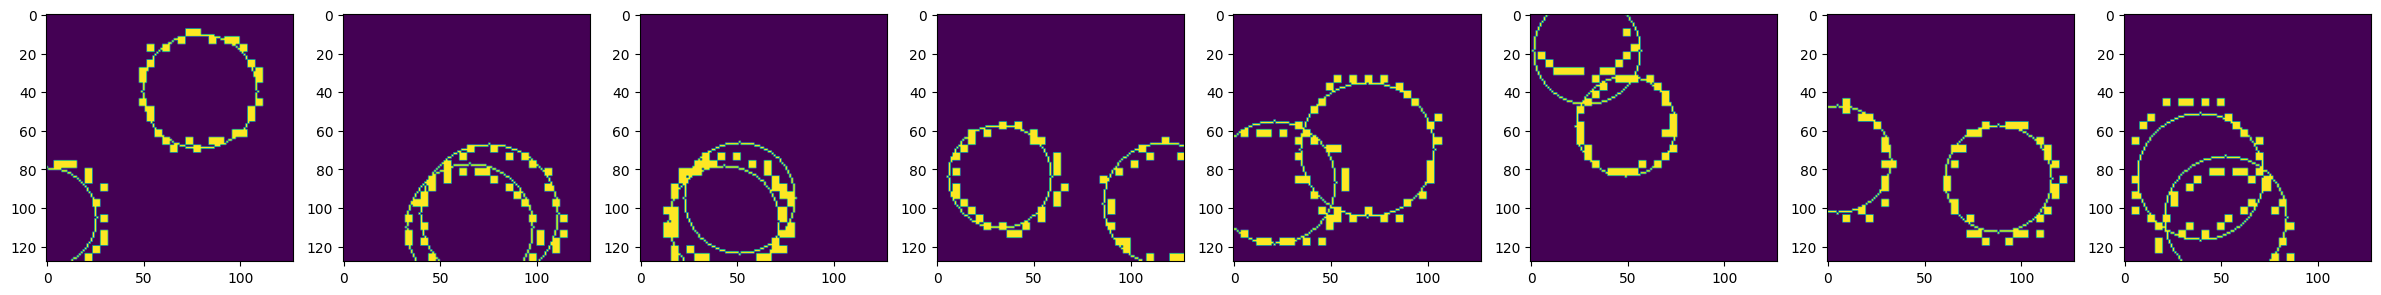

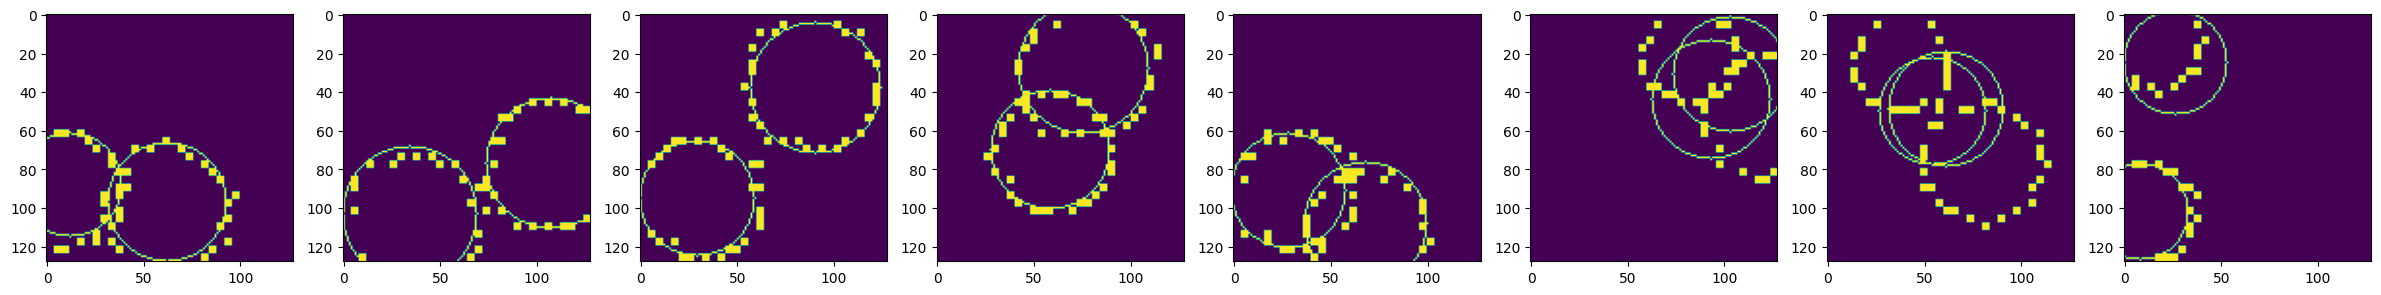

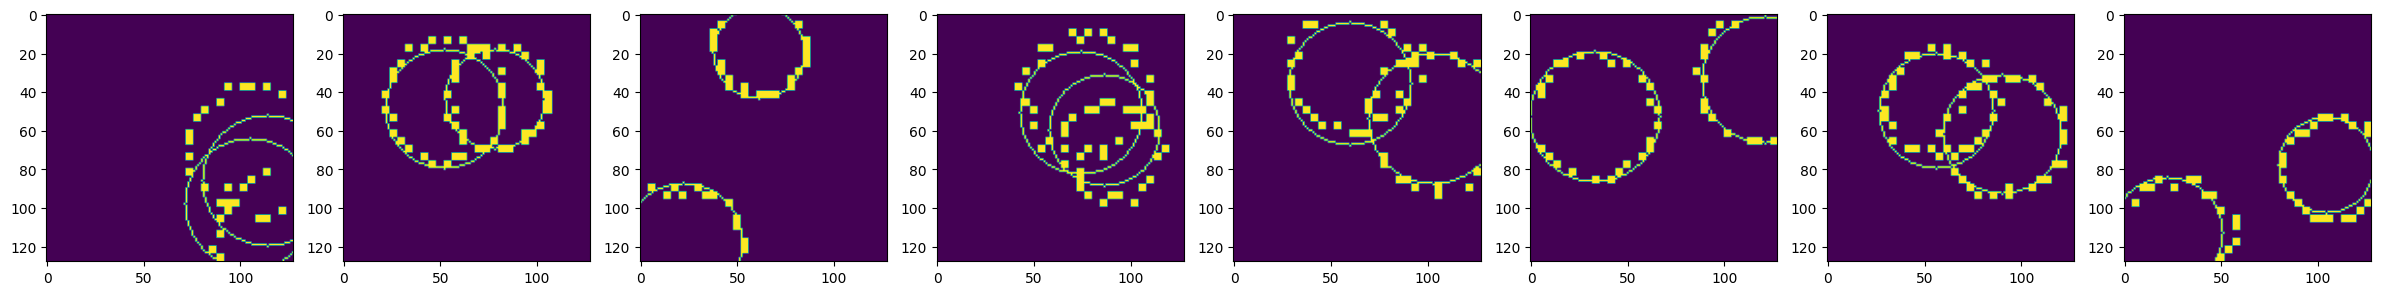

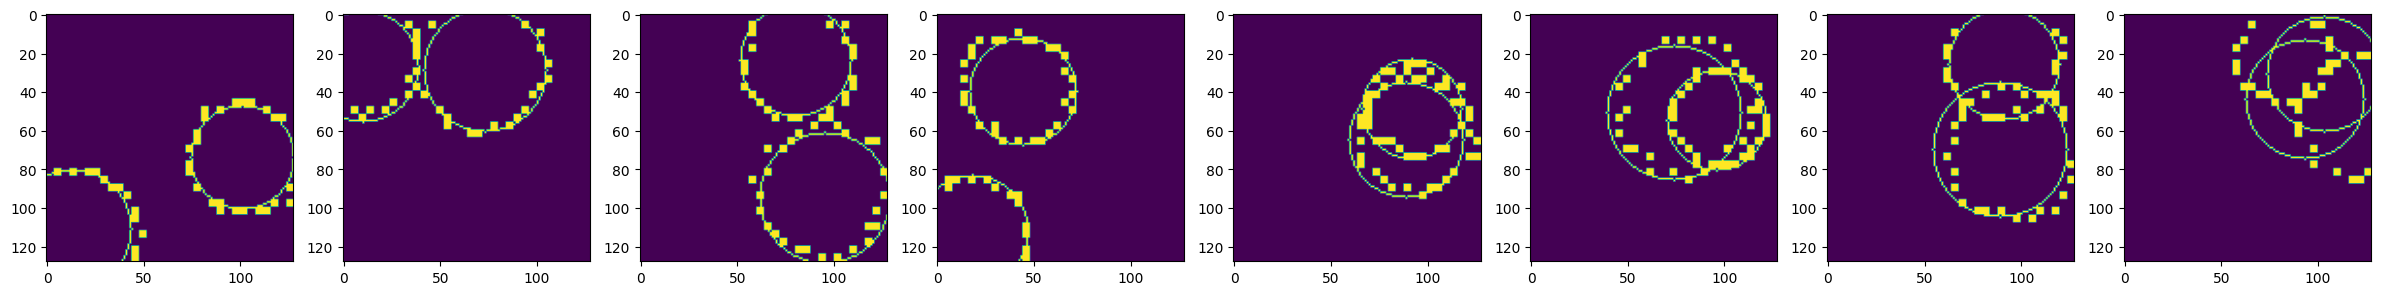

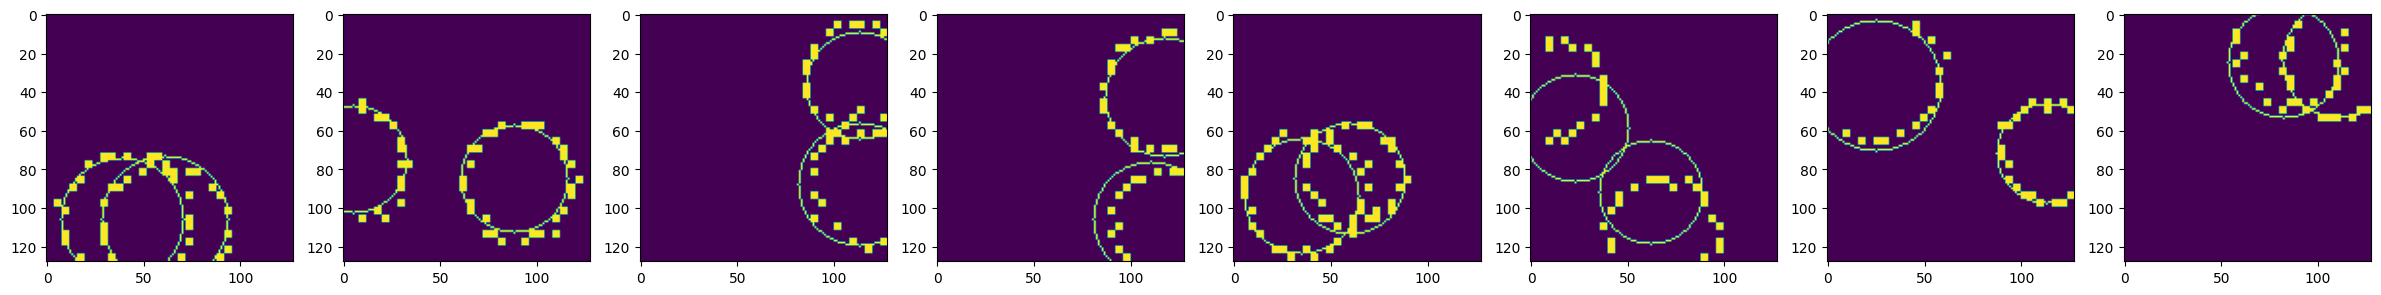

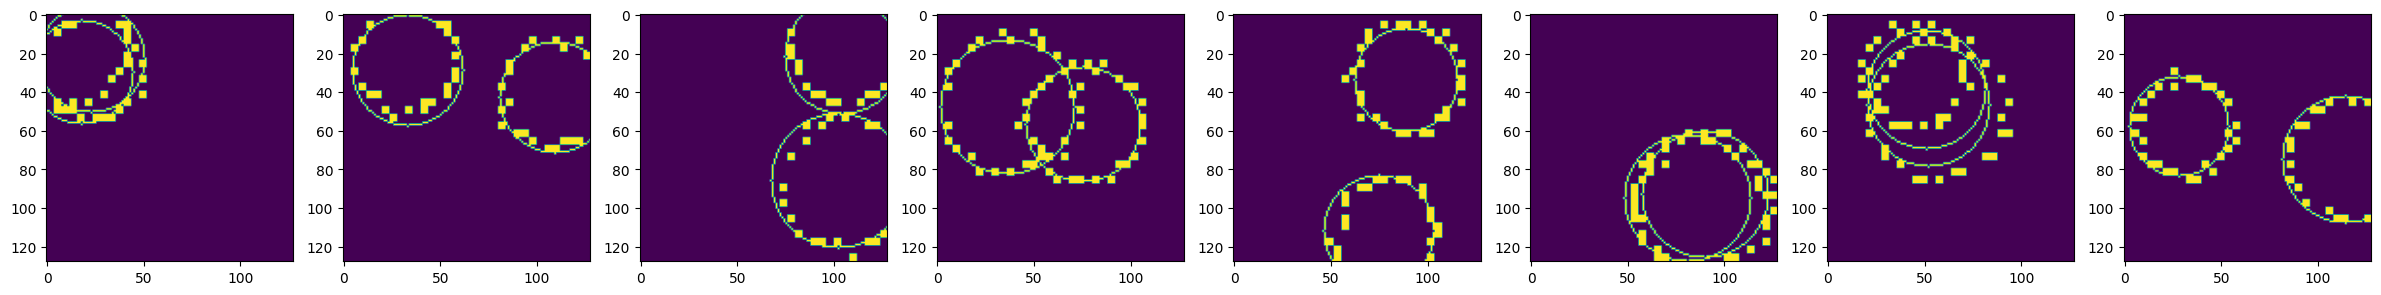

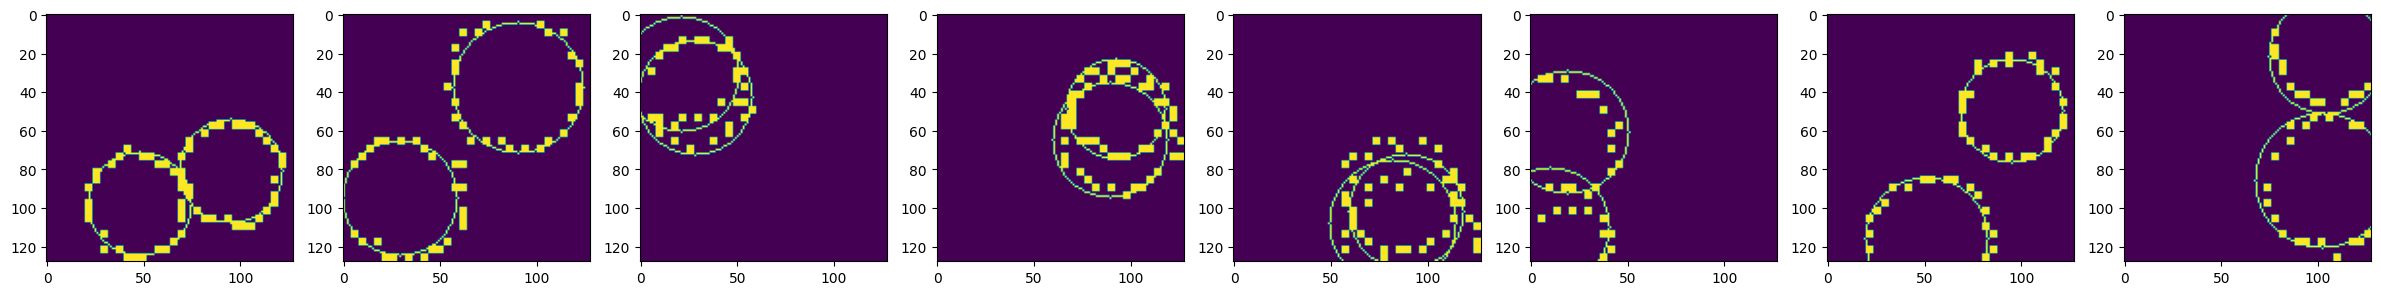

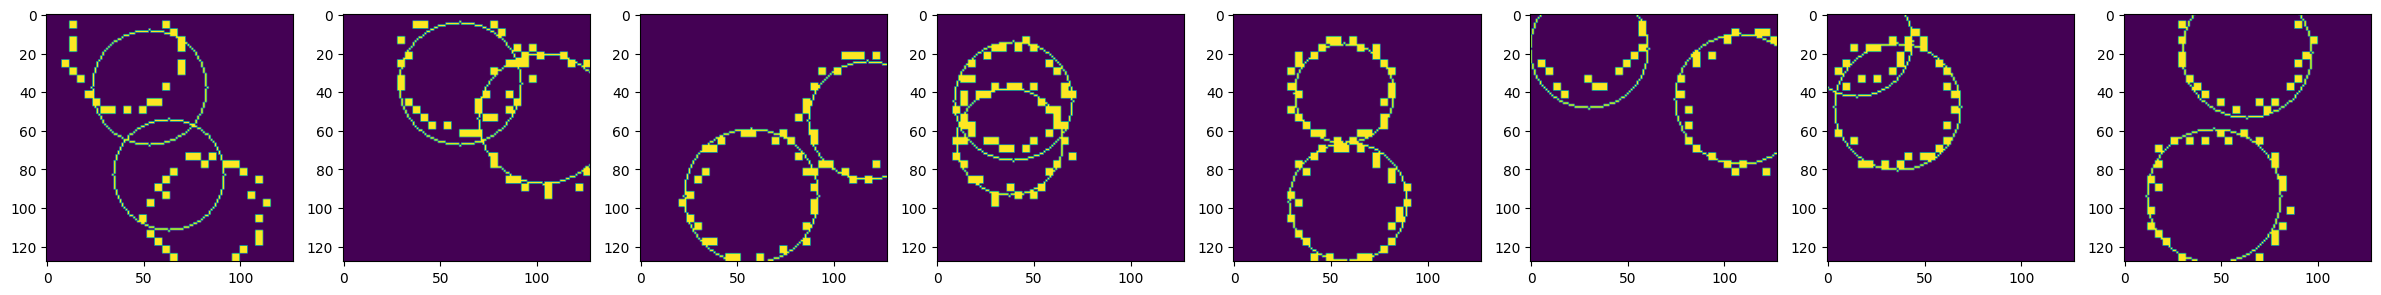

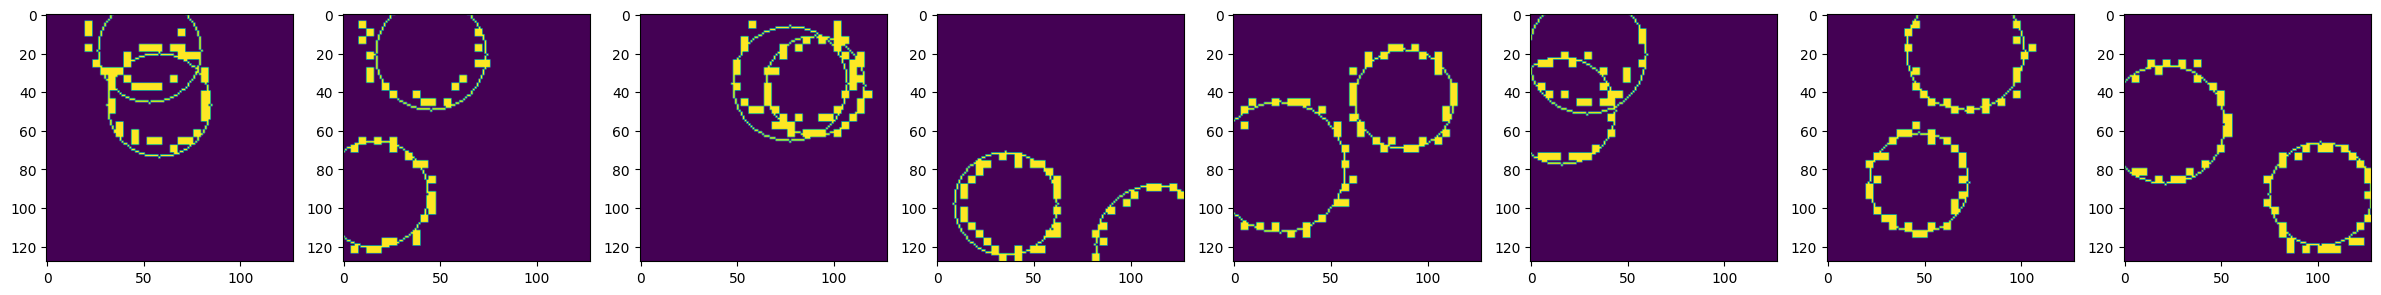

In [4]:
model = tf.keras.models.load_model("models/two_rings_32x3-CNN-params.model")
for i in range(10):
    compare_true_and_predict(displays_test, params_test, model, i, show_true=False)